
####***In the context of diabetes testing, a false negative result means a test incorrectly indicates a person does not have diabetes, when they actually do.***

#### **Article Link:**
https://link.springer.com/article/10.1007/s44174-023-00104-w

##**PIMA Dataset**

**Importing Libraries**

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


**Importing Dataset**

In [2]:
pima = pd.read_csv("/content/pima.csv")

**Statistical Analysis of Dataset**

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
pima.shape

(768, 9)

In [6]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**CHecking null values**

In [7]:
pima.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Checking whether data is balanced or not**


In [12]:
pima.Outcome.value_counts()
# 0 for non-diabetic , 1 for diabetic
# data is not balanced

,count
Outcome,
0,500
1,268


**Visualizing distributions of dataset**

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

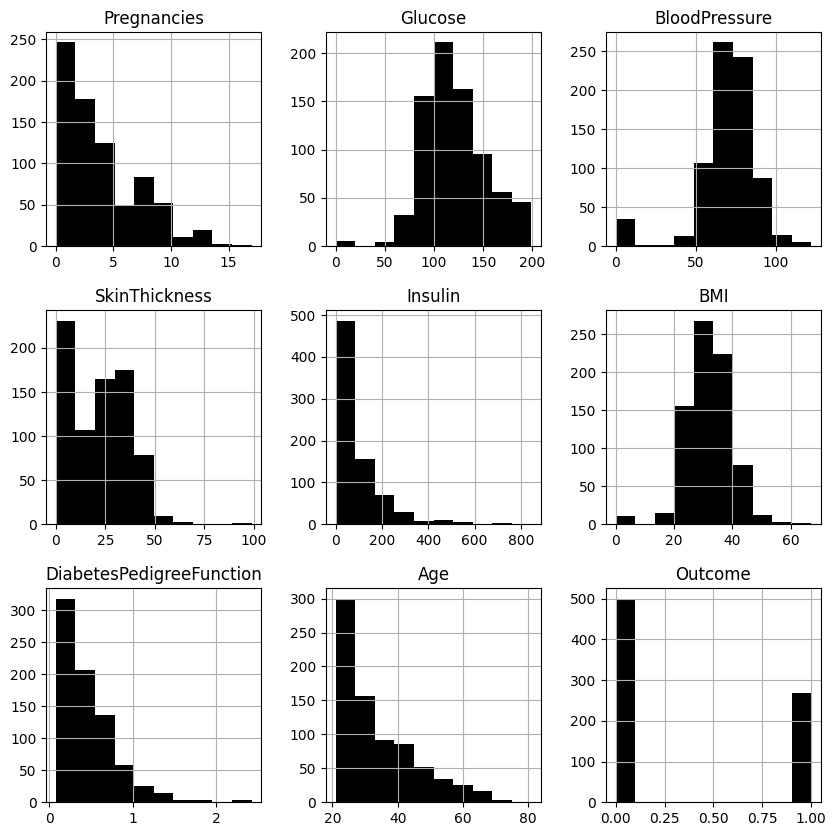

In [8]:
# Histogram
pima.hist(figsize=(10, 10),color='black')


<ipython-input-9-73a19753c208>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=pima, palette='hls')


<Axes: xlabel='Outcome', ylabel='count'>

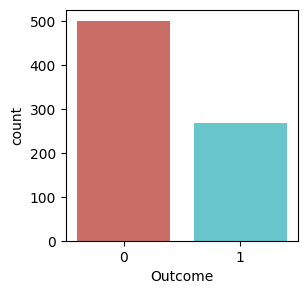

In [9]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outcome', data=pima, palette='hls')

<Axes: >

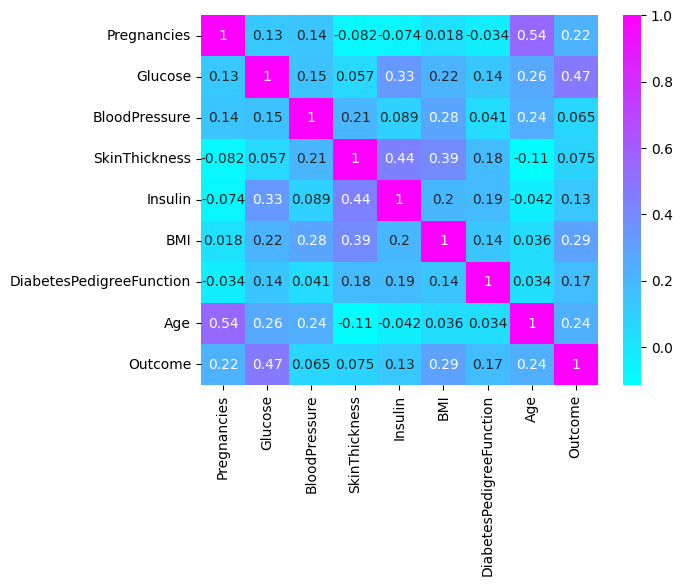

In [10]:
sns.heatmap(pima.corr(),annot=True, cmap='cool')

**Applying Machine Learning Models**

In [ ]:
X = pima.drop('Outcome', axis=1)
y = pima['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

**Test-Train split 75-25**

In [ ]:
# Model definition
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Dictionary to store accuracies of different models
accuracies = {}

# Perform prediction on alk the models

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # For Linear Regression change the target variable to binary
    if model_name == 'Linear Regression':
        y_pred = np.round(y_pred).astype(int)  # Round to 0 or 1
        y_pred = np.clip(y_pred, 0, 1)

    # Accuracy calculation and storing
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

# Analyzing accuracies for all models
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")

Linear Regression: 0.82
Logistic Regression: 0.82
KNN: 0.72
SVM: 0.82
Naive Bayes: 0.82
Decision Tree: 0.73
Random Forest: 0.78


**Visualizing models with their respective accuracies**

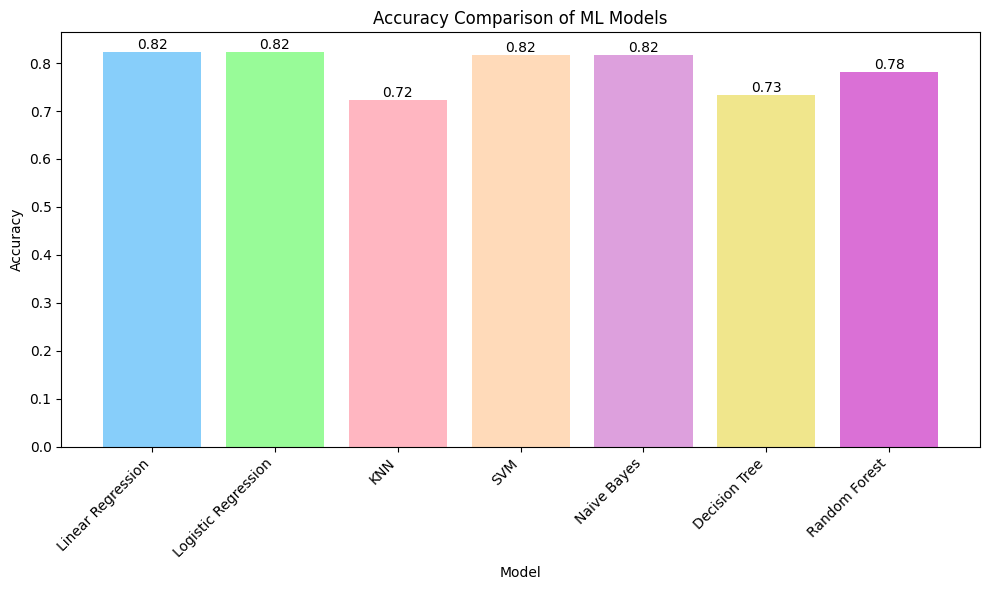

In [ ]:
# Get model names and accuracies
model_names = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Creating bar chart according to models and its accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color=['LightSkyBlue', 'PaleGreen', 'LightPink', 'PeachPuff', 'Plum', 'Khaki', 'Orchid'])

# Adding labels and title
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of ML Models")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add accuracy values on top of bars
for i, v in enumerate(accuracy_values):
    plt.text(i, v, f"{v:.2f}", color='black', ha='center', va='bottom')

#Representing the plot
plt.tight_layout()
plt.show()

###**Results:**



1.   Linear Regression, Logistic Regression, SVM and Naive Bayes performed best with the accuracy of **82%**
2.   In the paper, highest accuracy was of Random Forest algorithm and that was **79%**. In our implementation it is 78% **(almost equal)**
3. The accuracies of the models improved due to two factors:
random_state hyperparameter **(most suitable = 16)** and data points distribution in train-test split






###**Applying Kfold validation with 5 and 10 folds on all models**

In [ ]:
# Defining the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Cross validation for 5-folds and 10-folds
cv_5 = KFold(n_splits=5, shuffle=True, random_state=42)
cv_10 = KFold(n_splits=10, shuffle=True, random_state=42)

# For storing average accuracies of both folds strategies
average_accuracies = []

# Performing cross validation
for model_name, model in models.items():
    scores_5 = cross_val_score(model, X, y, cv=cv_5, scoring='accuracy')
    scores_10 = cross_val_score(model, X, y, cv=cv_10, scoring='accuracy')

    avg_5_fold = np.mean(scores_5)
    avg_10_fold = np.mean(scores_10)

    average_accuracies.append({
        'model': model_name,
        '5-fold': avg_5_fold,
        '10-fold': avg_10_fold
    })

# Print average accuracies
for item in average_accuracies:
    print(f"{item['model']}: 5-fold = {item['5-fold']:.4f}, 10-fold = {item['10-fold']:.4f}")

Logistic Regression: 5-fold = 0.7683, 10-fold = 0.7708
KNN: 5-fold = 0.6875, 10-fold = 0.6992
SVM: 5-fold = 0.7617, 10-fold = 0.7643
Naive Bayes: 5-fold = 0.7539, 10-fold = 0.7512
Decision Tree: 5-fold = 0.7317, 10-fold = 0.7213
Random Forest: 5-fold = 0.7669, 10-fold = 0.7604


In [ ]:
import mlflow
import mlflow.sklearn

# Set the tracking URI and experiment name
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
mlflow.set_experiment("Model Comparison with CV")

# Defining the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Cross-validation settings
cv_5 = KFold(n_splits=5, shuffle=True, random_state=42)
cv_10 = KFold(n_splits=10, shuffle=True, random_state=42)

# Storing average accuracies
average_accuracies = []

# Loop through each model and log results with MLflow
for model_name, model in models.items():
    # 5-fold CV
    scores_5 = cross_val_score(model, X, y, cv=cv_5, scoring='accuracy')
    avg_5_fold = np.mean(scores_5)

    with mlflow.start_run(run_name=f"{model_name} - 5 Fold"):
        mlflow.log_param("model", model_name)
        mlflow.log_param("fold_type", "5-fold")
        mlflow.log_metric("avg_accuracy", avg_5_fold)
        # Optional: mlflow.sklearn.log_model(model, f"{model_name}-5fold-model")

    # 10-fold CV
    scores_10 = cross_val_score(model, X, y, cv=cv_10, scoring='accuracy')
    avg_10_fold = np.mean(scores_10)

    with mlflow.start_run(run_name=f"{model_name} - 10 Fold"):
        mlflow.log_param("model", model_name)
        mlflow.log_param("fold_type", "10-fold")
        mlflow.log_metric("avg_accuracy", avg_10_fold)
        # Optional: mlflow.sklearn.log_model(model, f"{model_name}-10fold-model")

    # Store for print
    average_accuracies.append({
        'model': model_name,
        '5-fold': avg_5_fold,
        '10-fold': avg_10_fold
    })

# Print average accuracies
for item in average_accuracies:
    print(f"{item['model']}: 5-fold = {item['5-fold']:.4f}, 10-fold = {item['10-fold']:.4f}")


🏃 View run Logistic Regression - 5 Fold at: http://127.0.0.1:5000/#/experiments/727461359009697062/runs/5ef75a42c4584a3386d721b1ca90bf5e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/727461359009697062
🏃 View run Logistic Regression - 10 Fold at: http://127.0.0.1:5000/#/experiments/727461359009697062/runs/1620b63264144518aaae0d2bdd8559b4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/727461359009697062
🏃 View run KNN - 5 Fold at: http://127.0.0.1:5000/#/experiments/727461359009697062/runs/a8790382db6b405ea72e028f12186a68
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/727461359009697062
🏃 View run KNN - 10 Fold at: http://127.0.0.1:5000/#/experiments/727461359009697062/runs/7e88d55e793a4f3eb52fb1c177751c51
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/727461359009697062
🏃 View run SVM - 5 Fold at: http://127.0.0.1:5000/#/experiments/727461359009697062/runs/54c4b44757604b599d95af7b7ca9b785
🧪 View experiment at: http://127.0.0.1:5000/#/experim


**PIMA MLflow 6 Model Comparison 10 Fold**

In [ ]:
fold10_comp= "/content/drive/MyDrive/PAI/assigment1SS/pima 10fold.png"

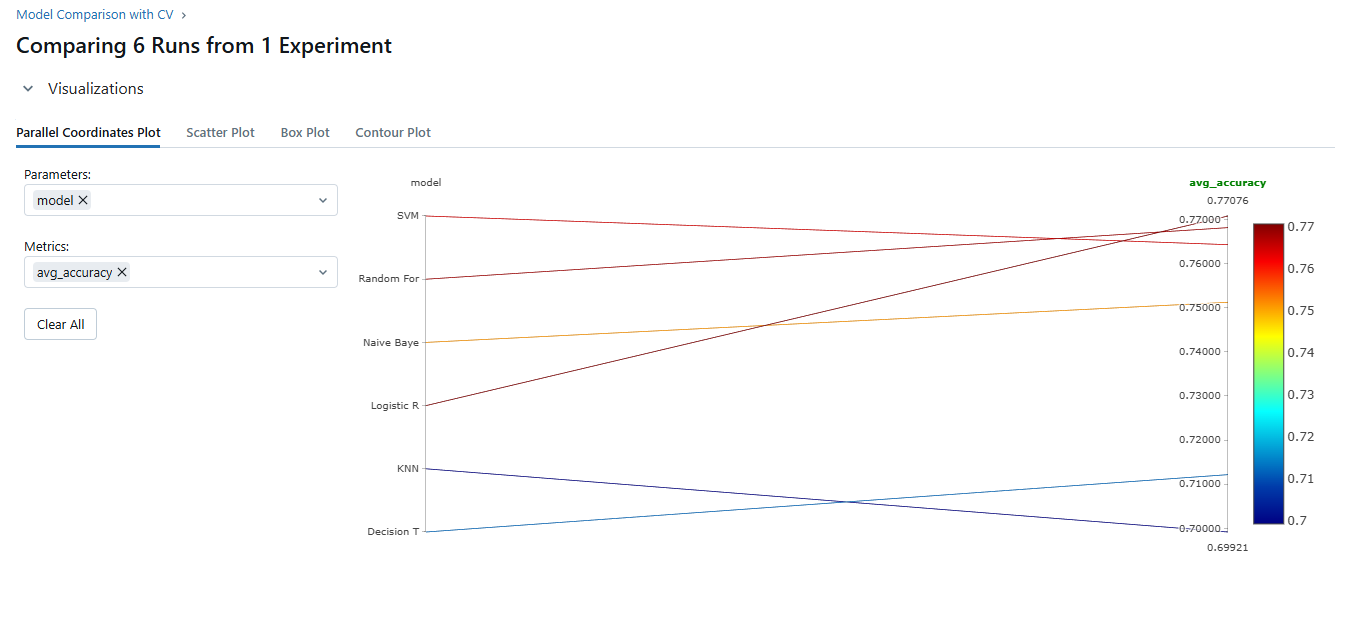

In [ ]:
from IPython.display import Image
Image(fold10_comp)

**PIMA MLFlow 6 Model Comparison 5 Fold**

In [ ]:
fold5_comp= "/content/drive/MyDrive/PAI/assigment1SS/pima 5 fold.png"


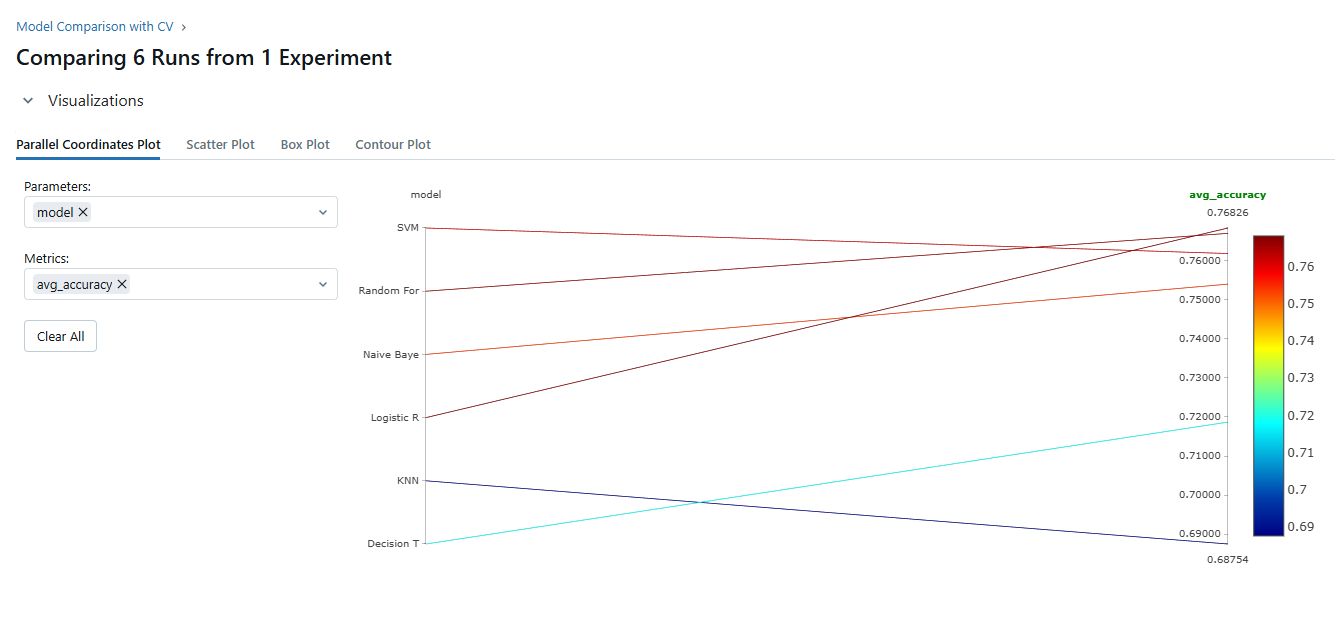

In [ ]:
Image(fold5_comp)

**Visualizing the results through bar plot**

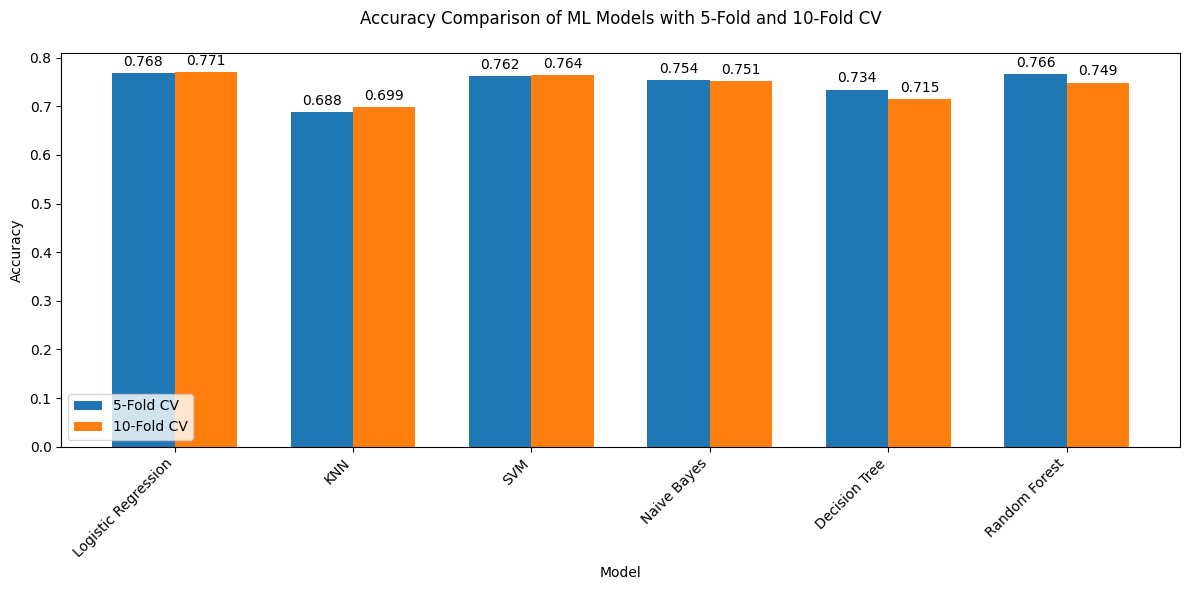

In [ ]:
# Extracting data from average_accuracies dictionary
model_names = [d['model'] for d in average_accuracies]
fold5_accuracies = [d['5-fold'] for d in average_accuracies]
fold10_accuracies = [d['10-fold'] for d in average_accuracies]

# Positionung the bars
bar_width = 0.35
index = np.arange(len(model_names))

# Creating the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(index, fold5_accuracies, bar_width, label='5-Fold CV')
rects2 = ax.bar(index + bar_width, fold10_accuracies, bar_width, label='10-Fold CV')

# Giving titles properly
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison of ML Models with 5-Fold and 10-Fold CV\n')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names, rotation=45, ha='right')  # Rotating for better readability
ax.legend()

# Adding value lables as well on top of bars for better readabiility
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

###**Results:**
Overall result comparison leads to the conclusion that **Logistic Regression, SVM and Random Forest** algorithms are the most **suitable ones** for PIMA dataset using **Kfold** strategy. However, **Logistic Regression outperformed** for both **5-folds** and **10-folds** cross valdiation strategy.


##**Diabetes Dataset 2019**

**Importing Dataset**

In [ ]:
diabetes2019 = pd.read_csv('/content/diabetes2019.csv')

**Statistical Analysis**

In [ ]:
diabetes2019.shape

(952, 18)

In [ ]:
diabetes2019.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [ ]:
diabetes2019.info()
# 14 object columns that need to be converted to numeric ones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [ ]:
diabetes2019.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


**Checking for null values in dataset**

In [ ]:
diabetes2019.isnull().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

**Analyzing the columns with null values to replace with mean/median**

**Boxplot for BMI to check outliers**

<Axes: ylabel='BMI'>

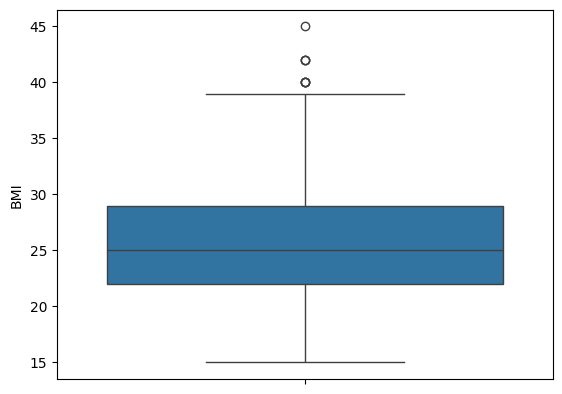

In [ ]:
sns.boxplot(y=diabetes2019['BMI'])

**Pregnancies column**

In [ ]:
diabetes2019.Pregancies.value_counts()

Pregancies
0.0    754
2.0     64
3.0     60
1.0     28
4.0      4
Name: count, dtype: int64

###**Data Cleaning**

In [ ]:
# BPLevel column correction, changing values to same case and removing space before normal
diabetes2019['BPLevel'] = diabetes2019['BPLevel'].str.lower()
diabetes2019['BPLevel'] = diabetes2019['BPLevel'].replace('Normal', 'normal')
diabetes2019['BPLevel'] = diabetes2019['BPLevel'].replace('normal ', 'normal')
# RegularMedicine value changing from 'o' to 'no'
diabetes2019.loc[9, 'RegularMedicine'] = 'no'
# Pdiabetes value changing from 0 to no
filtered_indices = diabetes2019[diabetes2019['Pdiabetes'] == '0'].index
diabetes2019.loc[filtered_indices, 'Pdiabetes'] = 'no'
# Diabetic, changing a case where there is a space before no value and it is considered different from the no without space
diabetes2019['Diabetic'] = diabetes2019['Diabetic'].replace(' no', 'no')

In [ ]:
for column in diabetes2019.columns:
    # Get unique values and their counts
    value_counts = diabetes2019[column].value_counts().to_dict()  # Convert to dictionary
    print(f"{column}': {value_counts}")

Age': {'less than 40': 488, '40-49': 164, '50-59': 156, '60 or older': 144}
Gender': {'Male': 580, 'Female': 372}
Family_Diabetes': {'no': 498, 'yes': 454}
highBP': {'no': 724, 'yes': 228}
PhysicallyActive': {'less than half an hr': 336, 'more than half an hr': 272, 'one hr or more': 212, 'none': 132}
BMI': {24.0: 111, 21.0: 88, 23.0: 76, 28.0: 71, 26.0: 66, 33.0: 64, 27.0: 63, 22.0: 58, 20.0: 48, 19.0: 36, 25.0: 34, 30.0: 33, 18.0: 32, 29.0: 28, 38.0: 28, 36.0: 20, 31.0: 16, 32.0: 16, 17.0: 16, 34.0: 12, 35.0: 12, 15.0: 8, 39.0: 4, 40.0: 4, 42.0: 3, 45.0: 1}
Smoking': {'no': 844, 'yes': 108}
Alcohol': {'no': 760, 'yes': 192}
Sleep': {7: 264, 8: 256, 6: 256, 5: 68, 9: 48, 4: 32, 10: 24, 11: 4}
SoundSleep': {6: 228, 4: 188, 5: 156, 8: 120, 7: 104, 3: 68, 2: 44, 10: 16, 9: 16, 11: 4, 1: 4, 0: 4}
RegularMedicine': {'no': 616, 'yes': 336}
JunkFood': {'occasionally': 672, 'often': 184, 'very often': 52, 'always': 44}
Stress': {'sometimes': 564, 'very often': 164, 'not at all': 136, 'always'

**Removing Missing values**

In [ ]:
diabetes2019['BMI'] = diabetes2019['BMI'].fillna(diabetes2019['BMI'].median())
diabetes2019['Pregancies'] = diabetes2019['Pregancies'].fillna(diabetes2019['Pregancies'].median())
diabetes2019['Pdiabetes'] = diabetes2019['Pdiabetes'].fillna(diabetes2019['Pdiabetes'].mode()[0])
diabetes2019['Diabetic'] = diabetes2019['Diabetic'].fillna(diabetes2019['Diabetic'].mode()[0])

**Label Encoding**

In [ ]:
label_encoder = LabelEncoder()
# Fit and transform the 'Diabetic' column
y = label_encoder.fit_transform(diabetes2019.Diabetic)

**One Hot Encoding of categorical variables**

In [ ]:
from sklearn.pipeline import Pipeline
numerical_features = ['BMI', 'Pregancies', 'SoundSleep','Sleep']
categorical_features = ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive',
                        'Smoking', 'Alcohol', 'RegularMedicine', 'JunkFood',
                        'Stress', 'BPLevel', 'Pdiabetes', 'UriationFreq']
# Perform one-hot encoding using pd.get_dummies
X = pd.get_dummies(diabetes2019, columns=categorical_features)
# Separate features
X = X.drop('Diabetic', axis=1)
X

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,Stress_not at all,Stress_sometimes,Stress_very often,BPLevel_high,BPLevel_low,BPLevel_normal,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often
0,39.0,8,6,0.0,False,True,False,False,False,True,...,False,True,False,True,False,False,True,False,True,False
1,28.0,8,6,0.0,False,True,False,False,False,True,...,False,True,False,False,False,True,True,False,True,False
2,24.0,6,6,0.0,True,False,False,False,False,True,...,False,True,False,False,False,True,True,False,True,False
3,23.0,8,6,0.0,False,True,False,False,False,True,...,False,True,False,False,False,True,True,False,True,False
4,27.0,8,8,0.0,True,False,False,False,False,True,...,False,True,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,25.0,8,6,0.0,False,False,False,True,False,True,...,False,True,False,False,False,True,True,False,True,False
948,27.0,6,5,0.0,False,False,True,False,False,True,...,False,True,False,True,False,False,True,False,False,True
949,23.0,6,5,0.0,False,False,True,False,False,True,...,False,True,False,True,False,False,True,False,True,False
950,27.0,6,5,0.0,False,False,True,False,False,True,...,False,False,True,True,False,False,True,False,True,False


**Applying KNN with 80-20 ratio**

In [ ]:
# Split data into training and testing sets for KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn_pipeline = Pipeline(steps=[
    ('classifier', KNeighborsClassifier(n_neighbors=3))  # KNN Classifier, neighbours = 3 for high accuracy
])
knn_pipeline.fit(X_train, y_train)

# Model evaluation
y_pred = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.92
Confusion Matrix:
[[120   4]
 [ 12  55]]


MLflow code for KNN

In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("KNN Single Model")

with mlflow.start_run(run_name="KNN Classifier"):

    # Log model parameters
    mlflow.log_param("model", "KNN")
    mlflow.log_param("n_neighbors", 3)
    mlflow.log_param("test_size", 0.2)

    # Log model performance metrics
    mlflow.log_metric("accuracy", accuracy)

    # Log the model itself
    mlflow.sklearn.log_model(knn_pipeline, "KNN_Model")

    print("\n KNN model has been logged to MLflow.")

2025/05/16 03:13:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 KNN model has been logged to MLflow.
🏃 View run KNN Classifier at: http://127.0.0.1:5000/#/experiments/943896704130806294/runs/ff74f3ac5a1c4c508e0e7d1eba9f6ad4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/943896704130806294


**Linear Regression**

In [ ]:

# Split data into training and testing sets in 70-30 ratio
lr_pipeline = Pipeline([
    ('classifier', LinearRegression()),
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

# 6. Threshold predictions for classification (important!)
y_pred_class = np.where(y_pred > 0.5, 1, 0) # Assuming 0 and 1 are class labels

# 7. Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8881118881118881
Confusion Matrix:
[[186   6]
 [ 26  68]]


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Linear Regression Classification")

with mlflow.start_run(run_name="Linear Regression Classifier"):

    # Log parameters
    mlflow.log_param("model", "LinearRegression")
    mlflow.log_param("test_size", 0.3)
    mlflow.log_param("threshold", 0.5)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)

    # Log the model
    mlflow.sklearn.log_model(lr_pipeline, "LinearRegression_Model")

    print("\n Linear Regression model logged to MLflow.")

2025/05/16 03:13:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 Linear Regression model logged to MLflow.
🏃 View run Linear Regression Classifier at: http://127.0.0.1:5000/#/experiments/203942366039851590/runs/8aedba5a15134c628afcd1457457c312
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/203942366039851590


**Logistic Regression**

In [ ]:
logistic_pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=500)),  # Increased max_iter if needed
])
logistic_pipeline.fit(X_train, y_train)
y_pred = logistic_pipeline.predict(X_test)

# 6. Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8951048951048951
Confusion Matrix:
[[186   6]
 [ 24  70]]


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Logistic Regression Experiment")

with mlflow.start_run(run_name="Logistic Regression Classifier"):

    # Log parameters
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_param("max_iter", 500)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)

    # Log the model
    mlflow.sklearn.log_model(logistic_pipeline, "LogisticRegression_Model")

    print("\n Logistic Regression model logged to MLflow.")

2025/05/16 03:14:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 Logistic Regression model logged to MLflow.
🏃 View run Logistic Regression Classifier at: http://127.0.0.1:5000/#/experiments/554665151305068104/runs/8ffdf6875d9a4815a036a52eba71342e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/554665151305068104


**Support Vector Machine**

In [ ]:
SVM_pipeline = Pipeline([
    ('classifier', SVC(kernel='linear')),  # kernel = linear for better accuracy
])
SVM_pipeline.fit(X_train, y_train)
y_pred = SVM_pipeline.predict(X_test)

# 6. Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8776223776223776
Confusion Matrix:
[[185   7]
 [ 28  66]]


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("SVM Classifier Experiment")

with mlflow.start_run(run_name="SVM Classifier (Linear Kernel)"):

    # Log parameters
    mlflow.log_param("model", "SVM")
    mlflow.log_param("kernel", "linear")

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)

    # Log the model
    mlflow.sklearn.log_model(SVM_pipeline, "SVM_Model")

    print("\n SVM model (linear kernel) logged to MLflow.")

2025/05/16 03:14:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 SVM model (linear kernel) logged to MLflow.
🏃 View run SVM Classifier (Linear Kernel) at: http://127.0.0.1:5000/#/experiments/972810778377062260/runs/34640f918b3440a193ffb3af70a60578
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/972810778377062260


**Random Forest**

In [ ]:
RF_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=40)), # highest accuracy for this random state
])
RF_pipeline.fit(X_train, y_train)
y_pred = RF_pipeline.predict(X_test)

# 6. Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.951048951048951
Confusion Matrix:
[[187   5]
 [  9  85]]


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # or your MLflow server URL
mlflow.set_experiment("SVM Classifier Experiment")

with mlflow.start_run(run_name="SVM Classifier (Linear Kernel)"):

    # Log model parameters
    mlflow.log_param("model", "SVM")
    mlflow.log_param("kernel", "linear")

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)

    # Log the model
    mlflow.sklearn.log_model(SVM_pipeline, "SVM_Model")

    print("\n SVM model logged to MLflow.")

2025/05/16 03:14:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 SVM model logged to MLflow.
🏃 View run SVM Classifier (Linear Kernel) at: http://127.0.0.1:5000/#/experiments/972810778377062260/runs/5a5b5e7e692e4cb3877e6b47cd6587fd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/972810778377062260


**Naive Bayes**

In [ ]:
NB_pipeline = Pipeline([
     ('classifier', GaussianNB()),
])
from sklearn.model_selection import GridSearchCV
param_grid = {
       'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
   }
grid_search = GridSearchCV(NB_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8531468531468531
Confusion Matrix:
[[171  21]
 [ 21  73]]


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Naive Bayes Classifier Experiment")

with mlflow.start_run(run_name="Naive Bayes with GridSearch"):

    # Log hyperparameters
    mlflow.log_param("model", "GaussianNB")
    mlflow.log_param("var_smoothing", best_params['classifier__var_smoothing'])

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)

    # Log the model
    mlflow.sklearn.log_model(best_model, "NaiveBayes_Model")

    print("\n Naive Bayes model with best var_smoothing logged to MLflow.")

2025/05/16 03:14:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 Naive Bayes model with best var_smoothing logged to MLflow.
🏃 View run Naive Bayes with GridSearch at: http://127.0.0.1:5000/#/experiments/523064632699565861/runs/7c05bae9ddcf4743877892993bd9af90
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/523064632699565861


**Decision Tree**

In [ ]:
decision_tree_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
])
decision_tree_pipeline.fit(X_train, y_train)
y_pred = decision_tree_pipeline.predict(X_test)

#Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.958041958041958
Confusion Matrix:
[[191   1]
 [ 11  83]]


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Decision Tree Classifier Experiment")

with mlflow.start_run(run_name="Decision Tree Default"):

    # Log model parameters (you can expand this with max_depth, criterion etc.)
    mlflow.log_param("model", "DecisionTree")
    mlflow.log_param("criterion", "gini")  # default
    mlflow.log_param("splitter", "best")   # default

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)

    # Log the model
    mlflow.sklearn.log_model(decision_tree_pipeline, "DecisionTree_Model")

    print("\n Decision Tree model logged to MLflow.")

2025/05/16 03:14:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 Decision Tree model logged to MLflow.
🏃 View run Decision Tree Default at: http://127.0.0.1:5000/#/experiments/523082315375535829/runs/8ad5f1391e7e44a99500fe6680c83313
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/523082315375535829


**Comparison of all models in MLFlow**

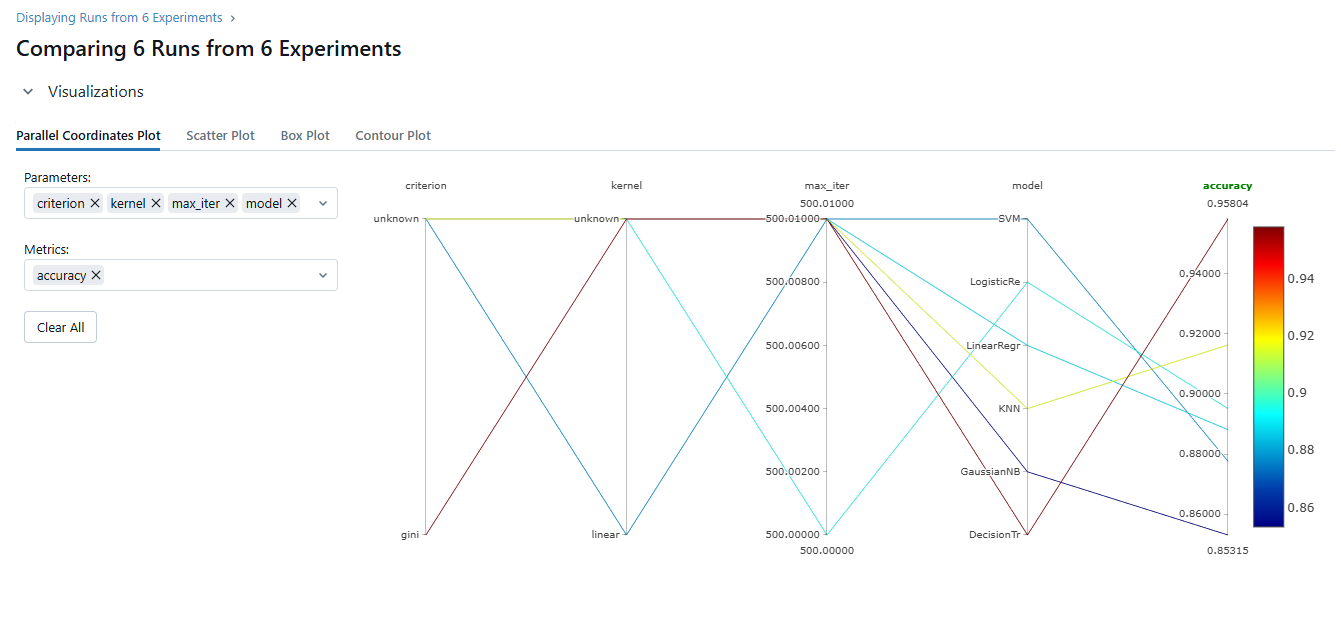

In [ ]:
comp_diabetes=("/content/drive/MyDrive/PAI/assigment1SS/diabetes/comp 6 models.png")
Image(comp_diabetes)

####**Data Balancing using Sampling up technique (SMOTE)**

In [ ]:
diabetes2019.Diabetic.value_counts()

Diabetic
no     686
yes    266
Name: count, dtype: int64

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

boolean_cols = X.select_dtypes(include=bool).columns
X[boolean_cols] = X[boolean_cols].astype(int)

# Assuming 'Diabetic' is your target variable column
over = SMOTE(random_state=42)
X_resampled, y_resampled = over.fit_resample(X, diabetes2019['Diabetic'])
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({'no': 686, 'yes': 686})


**Test-Train splitting for other algorithms except KNN**

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 42)

**KNN**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn_pipeline = Pipeline(steps=[
    ('classifier', KNeighborsClassifier(n_neighbors=6))  # KNN Classifier, neighbours = 6 for high accuracy
])
knn_pipeline.fit(X_train, y_train)

# Model evaluation
y_pred = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.94
Confusion Matrix:
[[131   7]
 [  9 128]]


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("KNN Classifier with Resampled Data")

with mlflow.start_run(run_name="KNN with Resampled Data"):
    mlflow.log_param("model", "KNN")
    mlflow.log_param("n_neighbors", 6)
    mlflow.log_param("test_size", 0.2)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(knn_pipeline, "KNN_Model_Resampled")
    print("\n KNN model with resampled data has been logged to MLflow.")


2025/05/16 03:14:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 KNN model with resampled data has been logged to MLflow.
🏃 View run KNN with Resampled Data at: http://127.0.0.1:5000/#/experiments/904133424082534312/runs/732128fb8ebd4d65a272259d4fce2d73
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/904133424082534312


**Linear Regression**

In [ ]:
lr_pipeline = Pipeline([
    ('classifier', LinearRegression()),
])
# Convert y_train2 and y_test2 to numeric using Label Encoding before fitting.
label_encoder = LabelEncoder()
y_train2_encoded = label_encoder.fit_transform(y_train2)
y_test2_encoded = label_encoder.transform(y_test2) # Use the same encoder to transform y_test2

lr_pipeline.fit(x_train2, y_train2_encoded)  # Use the encoded target for training
y_pred = lr_pipeline.predict(x_test2)
y_pred_class = np.where(y_pred > 0.5, 1, 0)  # Assuming 0 and 1 are class labels

# Calculate accuracy and confusion matrix using encoded target
accuracy = accuracy_score(y_test2_encoded, y_pred_class)
conf_matrix = confusion_matrix(y_test2_encoded, y_pred_class)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.883495145631068
Confusion Matrix:
[[187  20]
 [ 28 177]]


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Linear Regression as Classifier with Encoded Target")

with mlflow.start_run(run_name="Linear Regression Classifier on resampled Data"):
    mlflow.log_param("model", "LinearRegression")
    mlflow.log_param("threshold", 0.5)
    mlflow.log_param("test_size", 0.2)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(lr_pipeline, "LinearRegression_Model_Encoded")
    print("Linear Regression classifier with encoded labels has been logged to MLflow.")


2025/05/16 03:14:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression classifier with encoded labels has been logged to MLflow.
🏃 View run Linear Regression Classifier on resampled Data at: http://127.0.0.1:5000/#/experiments/556012749683484138/runs/281f7a6975cd4cf0ae61a0be58d53063
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/556012749683484138


**Logistic Regression**

In [ ]:
logistic_pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=500)),  # Increased max_iter if needed
])
logistic_pipeline.fit(x_train2, y_train2)
y_pred = logistic_pipeline.predict(x_test2)

# Evaluate
accuracy = accuracy_score(y_test2, y_pred)
conf_matrix = confusion_matrix(y_test2, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8956310679611651
Confusion Matrix:
[[193  14]
 [ 29 176]]


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Logistic Regression Classifier ")

with mlflow.start_run(run_name="Logistic Regression on resampled Data"):
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_param("max_iter", 500)
    mlflow.log_param("test_size", 0.2)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(logistic_pipeline, "LogisticRegression_Model")
    print("Logistic Regression model has been logged to MLflow.")


2025/05/16 03:14:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logistic Regression model has been logged to MLflow.
🏃 View run Logistic Regression on resampled Data at: http://127.0.0.1:5000/#/experiments/957995564255947635/runs/e3ecd6b72e574c008ad0fc15b64db7a3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/957995564255947635


**Support Vector Machine**

In [ ]:
SVM_pipeline = Pipeline([
    ('classifier', SVC(kernel='linear')),  # kernel = linear for better accuracy, 88 for linear
])
SVM_pipeline.fit(x_train2, y_train2)
y_pred = SVM_pipeline.predict(x_test2)

# Evaluate
accuracy = accuracy_score(y_test2, y_pred)
conf_matrix = confusion_matrix(y_test2, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8980582524271845
Confusion Matrix:
[[193  14]
 [ 28 177]]


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("SVM Classifier on resampled data")

with mlflow.start_run(run_name="SVM with Linear Kernel on resampled data"):
    mlflow.log_param("model", "SVM")
    mlflow.log_param("kernel", "linear")
    mlflow.log_param("test_size", 0.2)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(SVM_pipeline, "SVM_Model_LinearKernel")
    print("SVM model with linear kernel has been logged to MLflow.")


2025/05/16 03:14:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVM model with linear kernel has been logged to MLflow.
🏃 View run SVM with Linear Kernel on resampled data at: http://127.0.0.1:5000/#/experiments/789230082143771917/runs/34cd9c2057684803a620a198f47e4426
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/789230082143771917


**Random Forest**

In [ ]:
RF_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=40)), # highest accuracy for this random state
])
RF_pipeline.fit(x_train2, y_train2)
y_pred = RF_pipeline.predict(x_test2)

#Evaluate
accuracy = accuracy_score(y_test2, y_pred)
conf_matrix = confusion_matrix(y_test2, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9830097087378641
Confusion Matrix:
[[206   1]
 [  6 199]]


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Random Forest Classifier with resampled data")

with mlflow.start_run(run_name="Random Forest on resampled data"):
    mlflow.log_param("model", "RandomForestClassifier")
    mlflow.log_param("random_state", 40)
    mlflow.log_param("test_size", 0.2)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(RF_pipeline, "RandomForest_Model")
    print("Random Forest model has been logged to MLflow.")


2025/05/16 03:14:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest model has been logged to MLflow.
🏃 View run Random Forest on resampled data at: http://127.0.0.1:5000/#/experiments/848436575534844013/runs/903177611a5b4e759f0ef9c9153a08e9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/848436575534844013


**Decision Tree**

In [ ]:
decision_tree_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
])
decision_tree_pipeline.fit(x_train2, y_train2)
y_pred = decision_tree_pipeline.predict(x_test2)

#Evaluate
accuracy = accuracy_score(y_test2, y_pred)
conf_matrix = confusion_matrix(y_test2, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9781553398058253
Confusion Matrix:
[[205   2]
 [  7 198]]


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Decision Tree Classifier on resampled data")

with mlflow.start_run(run_name="Decision Tree on resampled data"):
    mlflow.log_param("model", "DecisionTreeClassifier")
    mlflow.log_param("test_size", 0.2)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(decision_tree_pipeline, "DecisionTree_Model")
    print("Decision Tree model has been logged to MLflow.")


2025/05/16 03:14:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Decision Tree model has been logged to MLflow.
🏃 View run Decision Tree on resampled data at: http://127.0.0.1:5000/#/experiments/759098621505111750/runs/4eac4763cdb0427cab62d7f20485b1b3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/759098621505111750


###**Comparison of all 6 Models in MLFlow after Resampling Data**

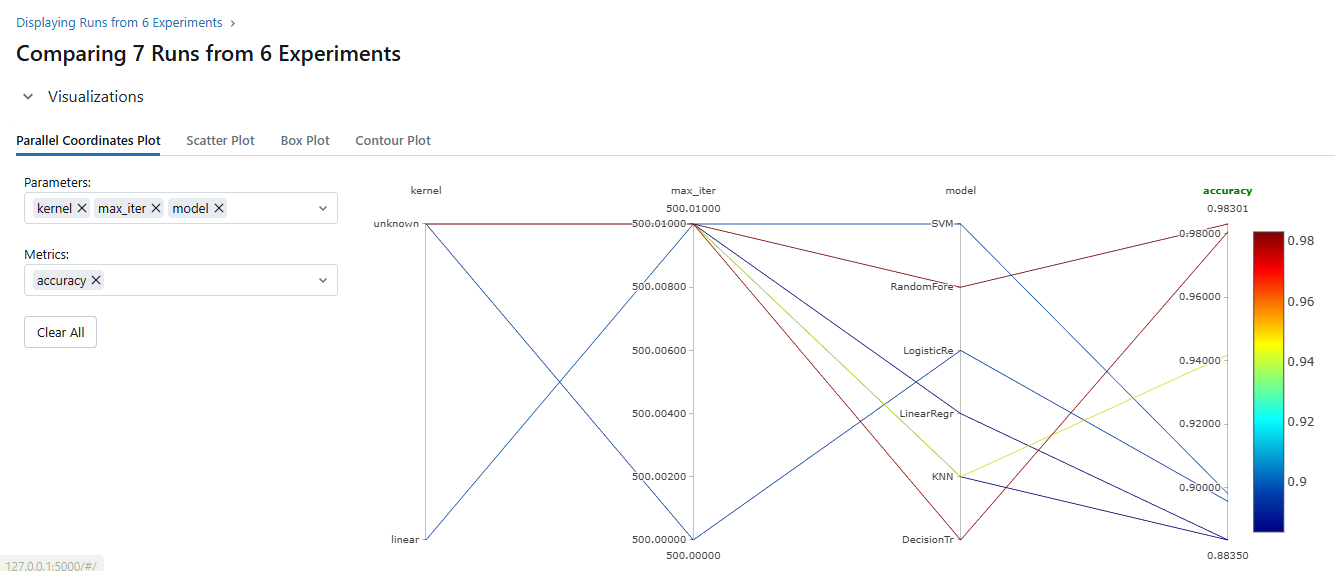

In [ ]:
comp_res=("/content/drive/MyDrive/PAI/assigment1SS/diabetes/resampled comp.png")
Image(comp_res)

###**Comparison of results with Paper**

####**Accuracy scores with imbalanced data**

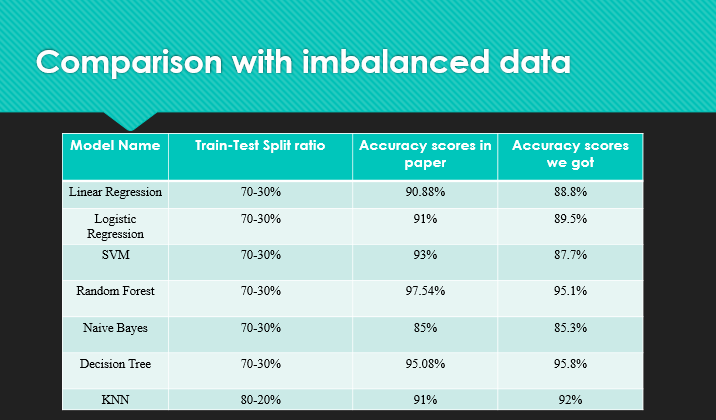

####**Accuracy scores with balanced data**

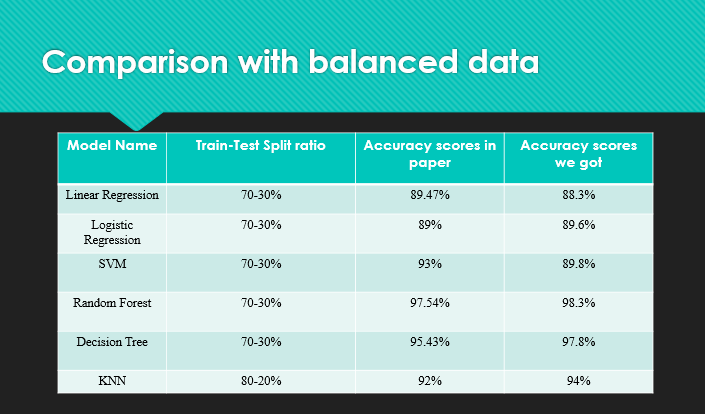

##**Results and Discussion:**


1.   Random Forest and Decision Tress algorithms outperformed among all ML algorithms on Diabetes2019 dataset

2.   Random Forest algorithm had the least number of false-negative cases (only 1) on balanced dataset, making it reliable among all models

3. Navie Bayes, Logistic Regression and Linear Regression did not perform well because of the non-linearity factor and their incompetence to handle imbalanced datasets

4. Our results are slightly different from the paper because the hyperparameters (max_iteration, n_neighbors, random_state) were not explicitly and clearly defined

5. RF, DT and KNN performed well in our settings than the paper because their might be difference of hyperparameter tuning and frameworks settings

6. Data-preprocessing techniques may have varied as well. It was mentioned in the paper that you can use mean or median strategy to impute the values. We have use median because there were outliers in the data. They may have used median strategy
